In [1]:
import matplotlib
from matplotlib import pyplot as plt

import numpy as np
import skimage as sk
import skimage.io as skio
from skimage import transform as tf
import cv2 
from scipy import signal
from scipy import interpolate
import scipy
from skimage import color
import math
import random

import sys, re
from os import listdir
from os.path import isfile, isdir, join
import os

## Depth Refocusing 

In [8]:
def get_images(folder):
    imgs, names = [], []
    for i in range(17): 
        img, name = [], []
        for j in range(17):
            img.append(skio.imread(join(folder, listdir(folder)[17 * i + j])) / 255)
            name.append(listdir(folder)[17 * i + j])
        imgs.append(img)
        names.append(name)
    return imgs, names

In [3]:
folder = "candy_rectified/rectified"
imgs, names = get_images(folder)

In [9]:
def shift_image(X, dx, dy):
    X = np.roll(X, dy, axis=1)
    X = np.roll(X, dx, axis=0)
    return X

In [10]:
def refocusing(imgs, save_name):
    alphas = np.arange(-3, 5, 1)
    
    for alpha in alphas:
        shifted_img = np.zeros(imgs[0][0].shape)
        for i in range(len(imgs)):
            for j in range(len(imgs)):
                shifted_img += shift_image(imgs[i][j], alpha * (8 - i), alpha * (j - 8))

        shifted_img = shifted_img / 289
        plt.imshow(shifted_img)
        plt.axis('off')
        plt.savefig(save_name + "/refocusing_" + str(alpha) + ".jpg", dpi=200)

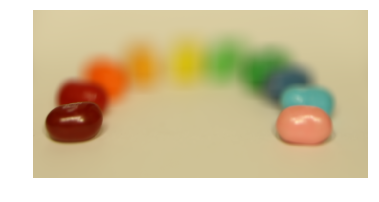

In [27]:
refocusing(imgs, "candy")

##  Aperture Adjustment 

In [11]:
def aperture_adj(imgs, save_name):
    radius = np.arange(0, 8, 1)
    for r in radius:
        shifted_img = np.zeros(imgs[0][0].shape)
        count = 0
        for i in range(len(imgs)):
            for j in range(len(imgs)):
                if (abs(i - 8) <= r) and (abs(j - 8) <= r):
                    shifted_img += shift_image(imgs[i][j], 0, 0)
                    count += 1

        shifted_img = shifted_img / count
        plt.imshow(shifted_img)
        plt.axis('off')
        plt.savefig(save_name + "/aperture_" + str(r) + ".jpg", dpi=200)

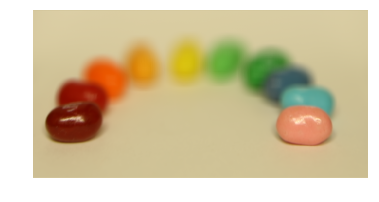

In [18]:
aperture_adj(imgs, "candy")

## Other Images 

Chess Board

In [6]:
folder = "chess_rectified/rectified"
imgs, names = get_images(folder)

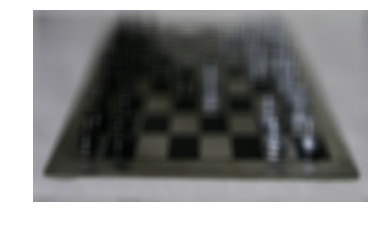

In [9]:
refocusing(imgs, "chess")

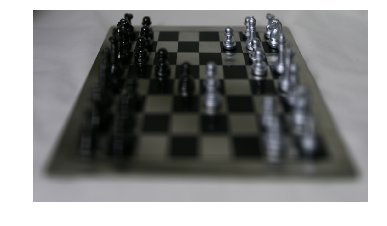

In [12]:
aperture_adj(imgs, "chess")

Treasure Chest

In [6]:
folder = "chest_rectified/rectified"
imgs, names = get_images(folder)

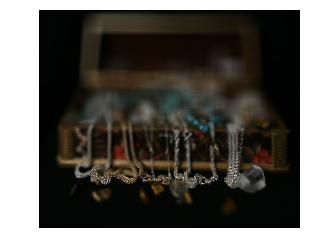

In [8]:
refocusing(imgs, "chest")

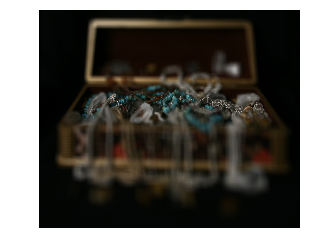

In [9]:
aperture_adj(imgs, "chest")

Bells & Whistles

In [12]:
folder = "bellswhistles_rectified/bellswhistles"
imgs, names = get_images(folder)

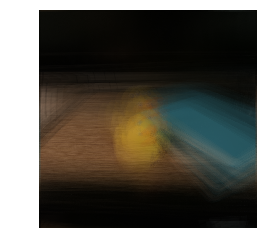

In [13]:
refocusing(imgs, "bellswhistles")

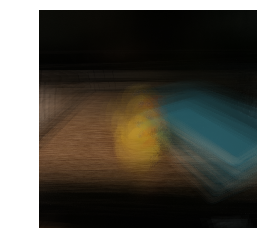

In [14]:
aperture_adj(imgs, "bellswhistles")